# Simulation d'échantillons d'une loi de Bernoulli

## Présentation de l'activité
- **Niveau de classe :** 
 -  Classe de première de la voie technologique (tronc commun).
- **Références au programme :** 
 - Tronc commun de première de la voie technologique : *simuler des échantillons de taille n d’une loi de Bernoulli de paramètre $p$ à partir d’un générateur de nombres aléatoires entre 0 et 1*.
 - Tronc commun de première de la voie technologique : *représenter par un histogramme ou par un nuage de points les fréquences de $1$ dans $N$ échantillons de taille n d’une loi de Bernoulli*.
 - Tronc commun de première de la voie technologique : *compter le nombre de valeurs situées dans un intervalle de la forme $[p-ks;p+ks]$ pour $k\in\{ 1,2,3\}$*.
- **Description :** cette activité permet dans un premier temps de simuler un jeu à deux issues (gagner ou perdre). Dans un deuxième temps, on propose de calculer mathématiquement la probabilité de gagner $p$. Puis on simule $N$ échantillons de $n$ parties de ce jeu. On écrit alors un programme qui calcule la moyenne $m$ et l'écart-type $s$ de la série statistique constituée des fréquences de gagner observées sur chaque échantillon de $n$ parties. On observe la fluctuation de ces fréquences autour de $p$ et on compte la proportion des cas où ces fréquences sont situées dans un intervalle de la forme $[p-ks;p+ks]$ pour $k\in\{ 1,2,3\}$. 

## Un jeu
On considère un jeu dans lequel on dispose d'un dé à six faces numérotées de $1$ à $6$ et d'une pièce ayant un côté Pile et un côté Face. Le dé est bien équilibré, en revanche la pièce a deux fois plus de chance de tomber sur Pile que sur Face. Dans ce jeu, on lance tout d'abord le dé et on lit le chiffre apparaissant sur la face supérieure.
- Si le $6$ apparaît, alors le joueur a gagné.
- Si un nombre impair apparaît, alors le joueur a perdu.
- Si le nombre $2$ ou $4$ apparaît, alors on lance la pièce. Si on obtient Pile, alors le joueur a gagné sinon, il a perdu.


## Simulation du dé

Pour simuler le dé, on utilise la fonction `randint` de la bibliothèque `random`. Cette fonction permet de générer aléatoirement, de manière équiprobable, un nombre entier compris entre deux bornes. Ce nombre correspond au numéro de la face du dé obtenu après un lancer.

L'instruction suivante permet l'importation de la fonction `randint` de la bibliothèque `random`. 

In [1]:
from random import randint

La fonction `simulDe` renvoie un nombre entier aléatoire compris entre $1$ et $6$. 

In [2]:
def simulDe():
	return randint(1,6)

simulDe()

2

## Simulation de la pièce
La simulation du lancer de la pièce utilise la fonction `random` de la bibliothèque `random`. Cette fonction renvoie un nombre de type flottant compris entre $0$ et $1$. 

Importation de la fonction `random` de la bibliothèque `random`

In [3]:
from random import random

La fonction `simulPiece` renvoie $1$ avec la probabilité $\frac{2}{3}$ et $0$ avec la probabilité $\frac{1}{3}$. Le $1$ correspond à l'obtention de Pile et le $0$ à l'obtention de Face.

In [4]:
def simulPiece():
    X = random()
    if X < 2/3:
        return 1
    else:
        return 0
    
simulPiece()

0

<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Compléter un programme**

    Le programme précédent étant fourni en remplaçant les lignes 3 et 6 par `if X...` et `return ...`, demander aux élèves de compléter les lignes 3 et 6.
- **Tester** plusieurs fois la fonction `simulPiece` et vérifier la cohérence des résultats.

- **Mathématiques débranchées**

Montrer que la probabilité $p$ de gagner à ce jeu est égale à $\frac{7}{18}$.

## Simulation du jeu
Les fonctions précédentes permettent de simuler le jeu.

La fonction `jeu` simule une partie et renvoie 0 si le joueur a perdu et 1 s'il a gagné.

In [5]:
def jeu():
	X = simulDe()
	if X == 6:
		return 1
	elif X==1 or X==3 or X==5:
		return 0
	else:
		Y=simulPiece()
		if Y==1:
			return 1
		else:
			return 0
        
jeu()

0

<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Compléter un programme**

    Le programme précédent étant fourni en remplaçant les lignes 3, 5, 9 et 12 par `if X...`, `elif ...`, `if Y==...` et `return ...`, demander aux élèves de compléter les lignes 3, 5, 9 et 12. 
- **Écrire un programme**

    Écrire une fonction `simulPiece` simulant une partie.

## Simulation de $n$ parties
La fonction `frequence` prend en paramètre un entier naturel $n$ correspondant au nombre de parties jouées et renvoie la fréquence de succès au cours de ces parties.


In [6]:
def frequence(n):
    nbSucces = 0
    for i in range(n):
       nbSucces = nbSucces+jeu()
    return nbSucces/n

print(frequence(50))

0.34


<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Compléter un programme**

     Le programme précédent étant fourni en remplaçant les lignes 2, 3, 4, 5, 6 et 7 par `nbSucces = ...`, `for i in range(...)`, `X = ...`, `if X==...`, `nbSucces = ...` et `return ...`, demander aux élèves de compléter les lignes 2, 3, 4, 5, 6 et 7.
- **Écrire un programme**

    Écrire une fonction `frequence` donnant la fréquence des parties gagnées sur $n$ parties simulées.

## Calcul des fréquences de succès sur $N$ échantillons de taille $n$

Il est maintenant possible de générer $N$ échantillons de taille $n$ et de calculer pour chacun d'eux la fréquence de succès. 

La fonction `echantillonFrequence` prend en paramètres deux entiers $N$ et $n$. L'entier $N$ correspond au nombre d'échantillons et l'entier $n$ à la taille commune à tous ces échantillons. Elle renvoie une liste contenant les $N$ fréquences de succès calculées sur chacun des échantillons. 

In [7]:
def echantillonFrequence(N,n):
	echantillon = []
	for i in range(N):
		echantillon.append(frequence(n))
	return echantillon

<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Compléter un programme**

    Le programme précédent étant fourni en remplaçant la ligne 4 par `echantillon.append(...)`, demander aux élèves de compléter la ligne 4.
- **Écrire un programme**

    Écrire une fonction `echantillonFrequence` donnant une liste contenant les $N$ fréquences des $N$ parties de $n$ jeux.

Les instructions suivantes permettent l'importation des librairies graphiques.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

**Représentation du nuage de points et de l'histogramme des fréquences de 1 dans N échantillons simulant chacun $n$ parties du jeu.**

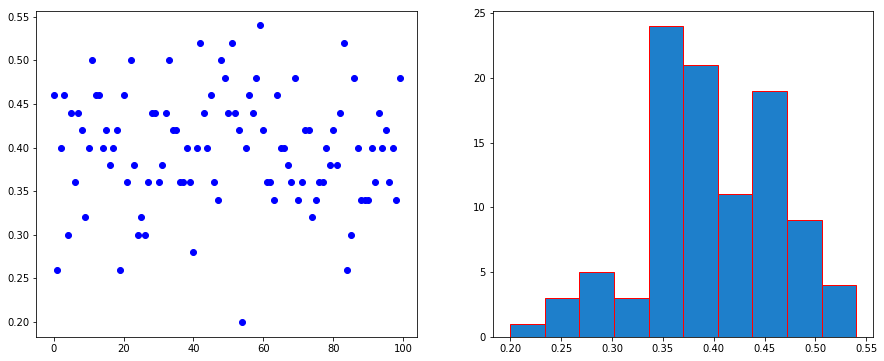

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 6))

N=100
n=50

echantillon = echantillonFrequence(N,n)

ax1.plot(echantillon,'bo')
ax2.hist(echantillon,color = '#1e7fcb',edgecolor = 'red')
plt.show()

<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Tester** le programme précédent en faisant varier $N$ et $n$. Comment semblent être réparties les valeurs ?

## Fluctuation d'échantillonnage

L'objectif est de montrer que, si les fréquences de succès correspondant aux différents échantillons fluctuent, cette fluctuation se fait autour de la probabilité $p$ et est contrôlée par l'écart-type de la distribution de ces fréquences. 

### Calculs de moyenne et d'écart-type

La fonction `moyenne` a pour paramètre une liste de nombres et renvoie la moyenne de cette liste.

In [10]:
def moyenne(L):
    n = len(L)
    s = 0
    for x in L:
        s = s + x
    return s/n

<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Compléter un programme** 

    Le programme précédent étant fourni en remplaçant les lignes 2, 3 et 5 par `n = len(...)`, `s = ...`, et `s = ...`, demander aux élèves de compléter les lignes 2, 3 et 5.
- **Écrire un programme :** 

    Écrire une fonction `moyenne` prenant une liste de nombres en paramètre et renvoyant la moyenne de la liste.

Les fonctions `variance` et `ecartType`  prennent une liste de nombres en paramètre et renvoient respectivement la variance et l'écart-type de cette liste.

In [11]:
def variance(L):
    n = len(L)
    s = 0
    for x in L:
        s = s + x**2
    return 1/n*s-moyenne(L)**2

def ecartType(L):
    return variance(L)**(1/2)

<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Compléter un programme :** 

    Le programme précédent étant fourni en remplaçant les lignes 3 et 5 par `s = ...` et `s = ...`, demander aux élèves de compléter les lignes 3 et 5.
- **Écrire un programme :** 

    Écrire deux fonctions `variance` et `ecartType` prenant une liste de nombres en paramètre et renvoyant respectivement la variance et l'écart-type de la liste.

### Calcul des bornes
On cherche maintenant à écrire une fonction qui, à partir l'une liste, donne un intervalle centré sur sa moyenne et d'amplitude proportionnelle à son écart-type. 

La fonction `bornes` prend en paramètres une liste `L` et un entier `k` et renvoie la liste des deux nombres $p-k \times s$ et $p+k \times s$, où $p$ est la probabilité de gagner, $s$ l'écart-type des valeurs de la liste `L` et $k$ un nombre entier (qui sera restreint à $1$, $2$ ou $3$).

In [12]:
def bornes(L,k):
    p = 7/18
    s = ecartType(L)
    return [p-k*s,p+k*s]

<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Compléter un programme :** 

    Le programme précédent étant fourni en remplaçant les lignes 2, 3 et 4 par `p = ...`, `s = ...` et `return ...`, demander aux élèves de compléter  les lignes 2, 3 et 4.
- **Écrire un programme**
 
 Écrire la fonction `bornes`.

### Proportion d'éléments de la liste compris dans les différents intervalles 
Nous allons maintenant calculer la proportion d'éléments de la liste appartenant à l'intervalle précédemment créé.

La fonction `propPoints` prend en paramètres une liste `L` et un entier `k` et renvoie la proportion des points de la liste compris entre $p-k \times s$ et $p+k \times s$, où $p$ est la probabilité de gagner, $s$ l'écart-type des valeurs de la liste `L` et $k$ un nombre entier.

In [13]:
def propPoints(L,k):
    b,B = bornes(L,k)
    filtre = [x for x in L if x<=B and x>=b]
    return len(filtre)/len(L)

<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Compléter un programme**

 Le programme précédent étant fourni en remplaçant les lignes 2, 3 et 4 par `b,B = ...`, `filtre = [x for x in L if ... and ...]` et `return ...`, demander aux élèves de compléter les lignes 2, 3 et 4. .
- **Écrire un programme**

    Écrire la fonction `propPoints`.
- **Tester** la fonction `propPoints` pour des échantillons de différentes tailles. Que peut-on observer ?

## Étude de la fluctuation des fréquences 
Cette partie est destinée à l'enseignant afin qu'il puisse montrer aux élèves comment fluctuent les différentes fréquences.

La proportion de points entre [p-1*s,p+1*s] est  0.63
La proportion de points entre [p-2*s,p+2*s] est  0.96
La proportion de points entre [p-3*s,p+3*s] est  1.0


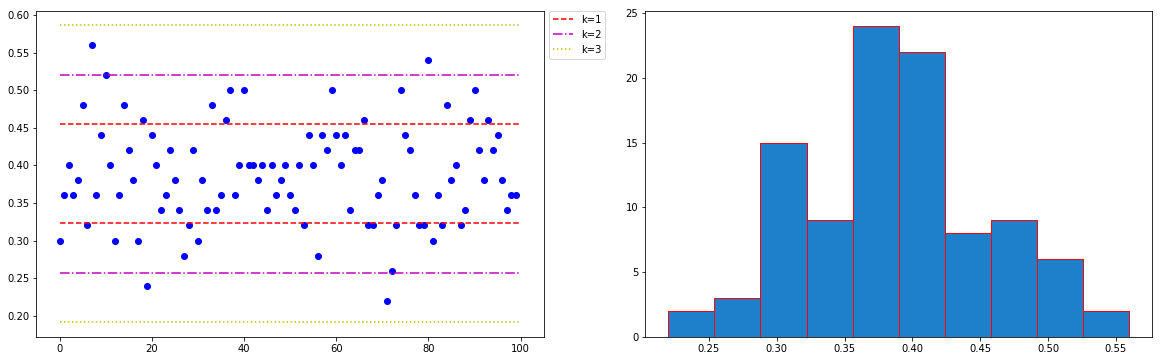

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 6))

N=100
n=50

echantillon = echantillonFrequence(N,n)

i1,s1 =  bornes(echantillon,1)
i2,s2 =  bornes(echantillon,2)
i3,s3 =  bornes(echantillon,3)

for i in range(3):
    print("La proportion de points entre [p-{0}*s,p+{0}*s] est ".format(i+1),propPoints(echantillon,i+1))

ax1.plot(echantillon,'bo')
ax1.plot([0,N],[i1,i1],'r--',label='k=1')
ax1.plot([0,N],[s1,s1],'r--')
ax1.plot([0,N],[i2,i2],'m-.',label='k=2')
ax1.plot([0,N],[s2,s2],'m-.')
ax1.plot([0,N],[i3,i3],'y:',label='k=3')
ax1.plot([0,N],[s3,s3],'y:')
ax1.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
ax2.hist(echantillon,color = '#1e7fcb',edgecolor = 'red')
plt.show()

## Convergence
Cette partie est destinée à l'enseignant. Elle illustre la convergence vers $p$, lorsque $n$ tend vers l'infini, des fréquences de succès calculées sur des échantillons simulés de taille $n$ d'une loi de Bernoulli de paramètre $p$. 

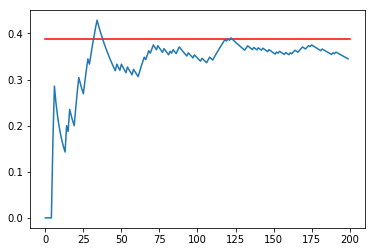

In [15]:
def cumul(n):
    X = []
    F = []
    for i in range(n):
        X.append(jeu())
        F.append(sum(X)/(i+1))
    return F
n=200        
F = cumul(n)
p = 7/18
plt.plot([0,n],[p,p],'r')
plt.plot(F)
plt.show()

## Animation susceptible d'être présentée aux élèves
Cette partie est destinée à l'enseignant pour illustrer son cours. 

In [19]:
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

#cte
n=200
p = 7/18


#paramètres figure
fig, ax1 = plt.subplots(1, 1,figsize=(10, 4))

#probabilité théorique
F = cumul(n)
lim = max(F)
points, = ax1.plot([],[])
ax1.plot([0,n],[p,p],'r')
ax1.set_ylim((0, lim+.1))

def init():
    return (points,)

def animate(i):
    global F
    points.set_data(list(range(i+1)), F[:i+1])
    return (points,)

plt.close ()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=n,init_func=init,blit=True,interval=75)
# l'un ou l'autre
HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())

## Animation susceptible d'être présentée aux élèves
Cette partie est destinée à l'enseignant pour illustrer son cours. 

In [21]:
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

#cte
N=50
n=40
p = 7/18
pause = 30

echantillon = echantillonFrequence(N,n)
i1,s1 =  bornes(echantillon,1)
i2,s2 =  bornes(echantillon,2)
i3,s3 =  bornes(echantillon,3)

#paramètres figure
fig, ax1 = plt.subplots(1,figsize=(10, 6))

#ax1.plot(echantillon,'bo')
ax1.plot([0,N],[p,p],'r',label='p')
bi1, = ax1.plot([],[],'g--',label='k=1')
si1, = ax1.plot([],[],'g--')
bi2, = ax1.plot([],[],'m-.',label='k=2')
si2, = ax1.plot([],[],'m-.')
bi3, = ax1.plot([],[],'y:',label='k=3')
si3, = ax1.plot([],[],'y:')
ax1.set_xlim((0, N))
ax1.set_ylim((.1,.7))

points, = ax1.plot([],[],'bo')

def init():
    points.set_data([], [])
    return (points,)

def animate(i):
    global echantillon
    if i>=N:
        bi1.set_data([0,N],[i1,i1])
        si1.set_data([0,N],[s1,s1])
        bi2.set_data([0,N],[i2,i2])
        si2.set_data([0,N],[s2,s2])
        bi3.set_data([0,N],[i3,i3])
        si3.set_data([0,N],[s3,s3])
        return (points,)
    points.set_data([range(i+1),echantillon[:i+1]])
    return (points,)
ax1.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.close ()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=N+pause,init_func=init,blit=True)
# l'un ou l'autre
HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())

<div class="alert alert-warning">

Remarques
</div>
 
Le programme de première technologique comporte deux commentaires sur l'écart-type des échantillons :
- *On constate que la série des fréquences observées des $1$ dans $N$ échantillons de taille $n$ d’une loi de Bernoulli a un écart-type de l’ordre de $\frac{1}{\sqrt{n}}$*
- *Pour plusieurs valeurs de $n$ on représente $\frac{1}{\sqrt{n}}$ en abscisse et, en ordonnée, l’écart-type $s$ des fréquences observées des $1$ dans $N$ échantillons (plusieurs centaines) de taille $n$ . On peut commenter ce résultat en observant que pour diviser la dispersion par $k$ il faut multiplier la taille de l’échantillon par $k^2$.*


À partir de cette activité, il serait également possible d'inclure ces parties du programme en générant les écarts-types de chaque échantillon en fonction de leur taille.